# ODI Guinea Bissau Geoplot
---
Glenn Abastillas

In [101]:
import altair as alt
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

import json

from pathlib import Path

maps = Path('data/maps')

%matplotlib inline

### Load and Clean Data

Load shapefiles

In [6]:
regioes = gpd.read_file(maps / 'regioes/GBregioes.shp')
estradas = gpd.read_file(maps / 'estradas/gnb_roads_estradas_1m_INEC.shp')

Load auxiliary data

In [49]:
rdbf = pd.read_csv(maps / 'regioes/GBregioes.dbf')

In [56]:
demographics = pd.read_csv('data/aux/GBDemographicSocioEconomic.csv')

In [72]:
healthsites = gpd.read_file('data/aux/GBHealthsites_big.txt')

Column names

In [13]:
regioes.columns

Index(['DN', 'geometry'], dtype='object')

In [14]:
estradas.columns

Index(['FNODE_', 'TNODE_', 'LPOLY_', 'RPOLY_', 'LENGTH', 'BIJGABROUT', 'TYPE',
       'geometry'],
      dtype='object')

Generate color mappings.

In [29]:
dn_count = regioes.DN.unique().size

In [36]:
factors, *_ = regioes.DN.factorize()

In [117]:
colors = np.random.rand(dn_count, 3)
colors[10:,:] = 0
colors[0, :] = 0

In [113]:
dn_count

40

### Plot Map

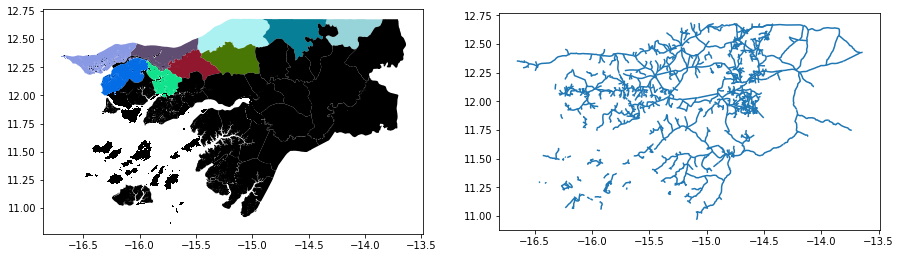

In [118]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 15))

regioes.plot(ax=ax1, color=colors[factors]); estradas.plot(ax=ax2)

### Altair

Data transformations

In [88]:
choro_regioes = json.loads(regioes.to_json())

In [95]:
choro_regioes_ = alt.Data(values=choro_regioes['features'])

In [105]:
choro_regioes_

Data({
  values: [{'id': '0', 'type': 'Feature', 'properties': {'DN': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-14.388749927450005, 12.631250150850008], [-14.387916594120007, 12.631250150850008], [-14.387916594120007, 12.630416817520008], [-14.388749927450005, 12.630416817520008], [-14.388749927450005, 12.631250150850008]]]}}, {'id': '1', 'type': 'Feature', 'properties': {'DN': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-14.405416594050006, 12.564583484450008], [-14.404583260720006, 12.564583484450008], [-14.404583260720006, 12.563750151120008], [-14.405416594050006, 12.563750151120008], [-14.405416594050006, 12.564583484450008]]]}}, {'id': '2', 'type': 'Feature', 'properties': {'DN': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-14.362083260890007, 12.527083484600007], [-14.361249927560007, 12.527083484600007], [-14.361249927560007, 12.526250151270009], [-14.362083260890007, 12.526250151270009], [-14.362083260890007, 12.527083484600007]]]}}, {'id': '3'

In [97]:
chart = alt.Chart(choro_regioes_).mark_geoshape()

In [104]:
chart.encode()

ValueError: DN encoding field is specified without a type; the type cannot be automatically inferred because the data is not specified as a pandas.DataFrame.

alt.Chart(...)